## Import Libraries

In [44]:
import os
import cv2                                       #OpenCV for image processing
import matplotlib.pyplot as plt                  #used to create visualisation 
import pandas as pd                              #pandas used for working with datasets
import seaborn as sns                            #used for creating statistical graph
import numpy as np
import warnings
import torch                                     #Pytorch module 


# sklearn libraries for ML models and feature extraction
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC                                         #Import Support Vector Machine
from sklearn.ensemble import RandomForestClassifier                 #Import Random Forest 
from sklearn.tree import DecisionTreeClassifier                     #Import Decision Tree
from sklearn.metrics import accuracy_score, classification_report   #For measuring accuracy
from sklearn.preprocessing import LabelEncoder
from skimage.feature import hog                                     #Import Histogram for feature extraction

%matplotlib inline
warnings.filterwarnings('ignore')

In [27]:
!pip install opencv-python


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


## Load Datasets

In [48]:
train_data = "/Users/nasrinjahan/Desktop/Indivisual Project/Project_NK/machineLearning_PlantDiseaseDetectionSystem/Plant_Diseases_Dataset/train"
vaild_data = "/Users/nasrinjahan/Desktop/Indivisual Project/Project_NK/machineLearning_PlantDiseaseDetectionSystem/Plant_Diseases_Dataset/valid"
diseases = os.listdir(train_data)

In [50]:
print(diseases)

['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Target_Spot', '.DS_Store', 'Peach___healthy', 'Potato___Late_blight', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mold', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Cedar_apple_rust', 'Tomato___Bacterial_spot', 'Grape___healthy', 'Tomato___Early_blight', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Apple_scab', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Squash___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot

In [60]:
# Display the available classes
class_names = format(len(diseases))
print(class_names)

39


In [72]:
print(type(diseases))  # check the disease data type
print(diseases)  # See actual content

Skipping unexpected label format: .DS_Store
Identified 14 unique plant species.
Identified 26 unique diseases.


In [74]:
plants = []
NumberOfDiseases = 0

for plant in diseases:  
    split_plant = plant.split('___')

    #skip invalid entries like '.DS_Store'
    if len(split_plant) < 2:
        print(f"Skipping unexpected label format: {plant}")  
        continue  #skip the iteration

    plant_name, disease = split_plant[:2]  #extract name and disease

    if plant_name not in plants:
        plants.append(plant_name)

    if disease != 'healthy':
        NumberOfDiseases += 1

print(f"Identified {len(plants)} unique plant species.")
print(f"Identified {NumberOfDiseases} unique diseases.")

Skipping unexpected label format: .DS_Store
Identified 14 unique plant species.
Identified 26 unique diseases.


In [76]:
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Strawberry', 'Grape', 'Potato', 'Blueberry', 'Corn_(maize)', 'Tomato', 'Peach', 'Pepper,_bell', 'Orange', 'Cherry_(including_sour)', 'Apple', 'Raspberry', 'Squash', 'Soybean']


In [78]:
len(plants)

14

In [84]:
# Count images in each category folder
imgCounter = {
    category: len([
        img for img in os.listdir(os.path.join(train_data, category))
        if img.lower().endswith(('.png', '.jpg', '.jpeg'))
    ])
    for category in os.listdir(train_data) if os.path.isdir(os.path.join(train_data, category))
}

# Convert to DataFrame & print results
classImg = pd.DataFrame.from_dict(imgCounter, orient='index', columns=['Images'])
print('Total Selected Images:', classImg['Images'].sum())

classImg

Total Selected Images: 70295


,Images
Strawberry___healthy,1824
Grape___Black_rot,1888
Potato___Early_blight,1939
Blueberry___healthy,1816
Corn_(maize)___healthy,1859
Tomato___Target_Spot,1827
Peach___healthy,1728
Potato___Late_blight,1939
Tomato___Late_blight,1851
Tomato___Tomato_mosaic_virus,1790


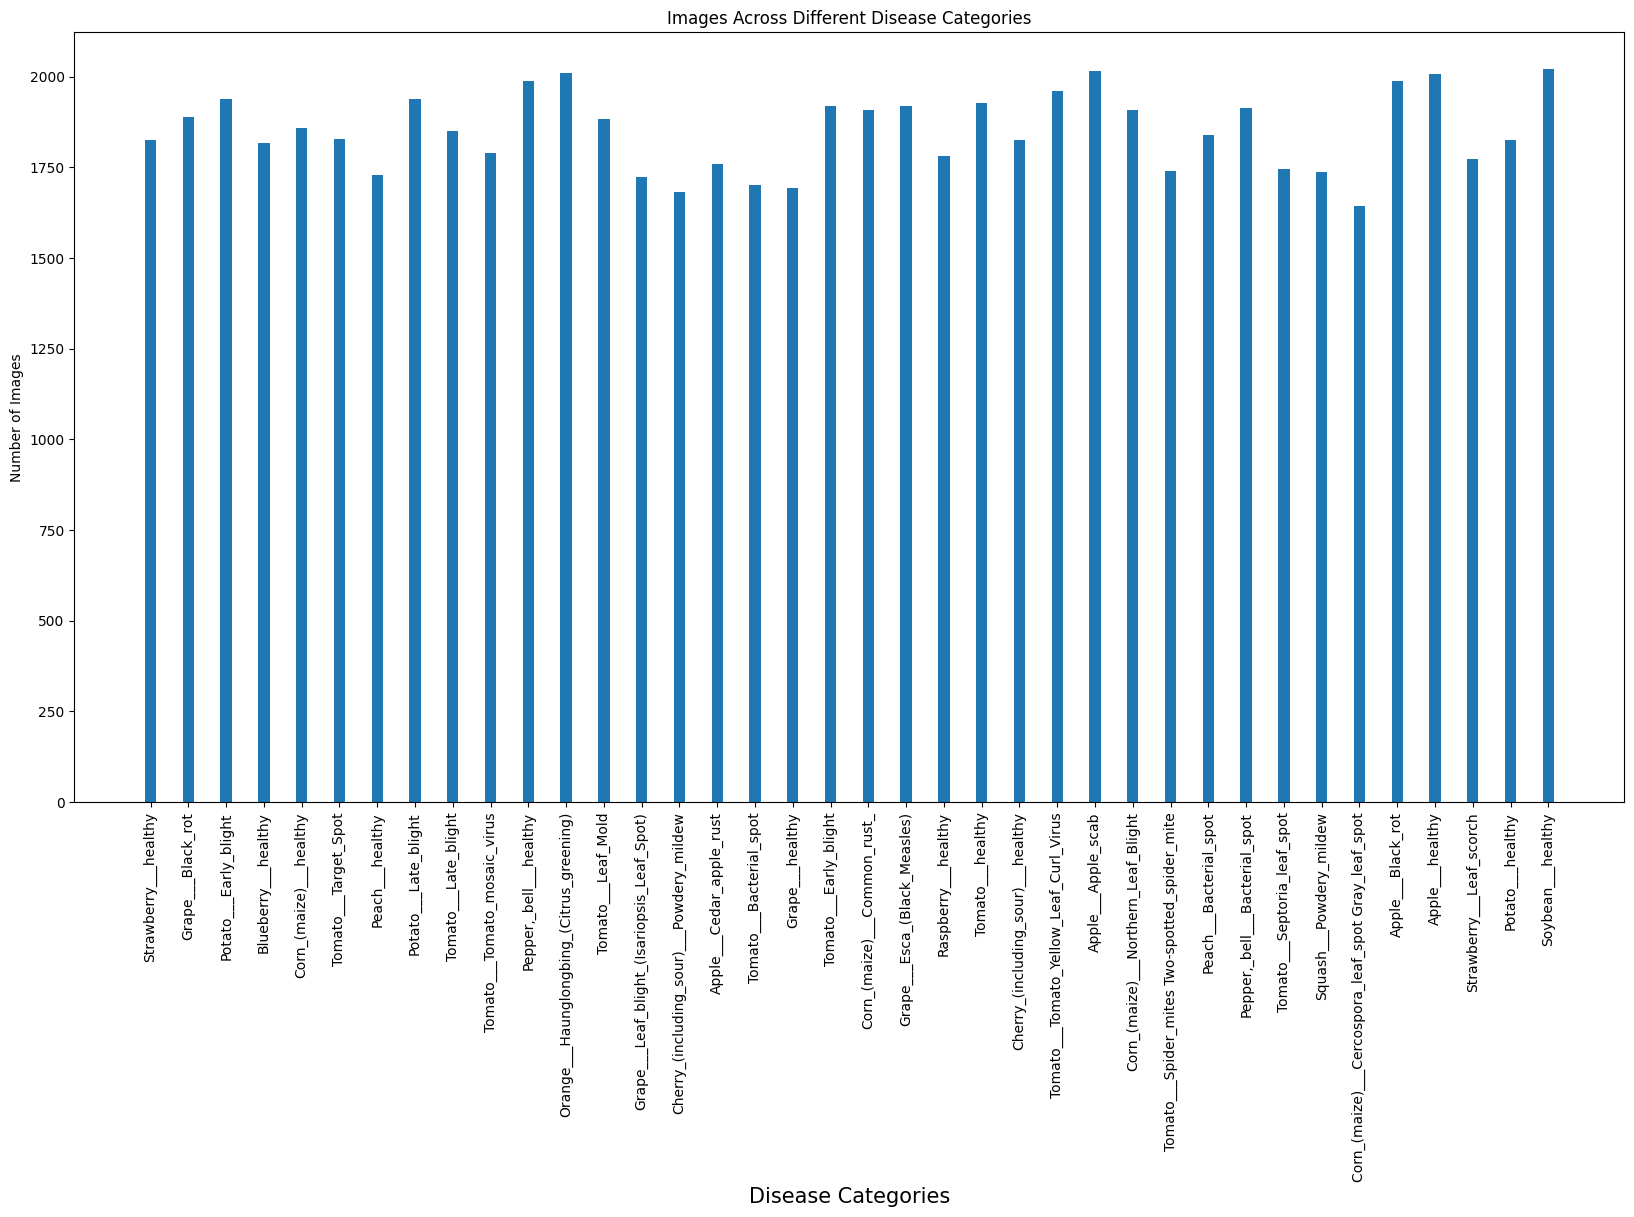

In [90]:
plt.figure(figsize=(20, 10))                                    #set figure size
plt.bar(range(len(imgCounter)), imgCounter.values(), width=0.3) # Create a bar chart (categories on X-axis, image counts on Y-axis)
plt.xlabel('Disease Categories', fontsize=15)                   # X-axis label
plt.ylabel('Number of Images', fontsize=10)                     #Y-axis label and set the font size
plt.xticks(range(len(imgCounter)), imgCounter.keys(), fontsize=10, rotation=90)  # Set category labels
plt.title('Images Across Different Disease Categories')         #Set the title of the bar chart
plt.show()                                                      # Display the plot